# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("mouse_metadata.csv")
study_results = pd.read_csv("study_results.csv")

# Combine the data into a single dataset
combined_results= pd.merge(mouse_metadata, study_results,how='outer',on='Mouse ID')
# Display the data table for preview
combined_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
len(combined_results['Mouse ID'].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_timepoint = combined_results.groupby(['Mouse ID','Timepoint'], as_index=False)['Sex'].count()
mouse_timepoint = mouse_timepoint.loc[mouse_timepoint['Sex'] == 2]
mouse_timepoint['Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_results.loc[combined_results['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_results = combined_results.loc[combined_results['Mouse ID'] != 'g989']
combined_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(combined_results['Mouse ID'].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = combined_results.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = regimen_group['Tumor Volume (mm3)'].mean()
tumor_median = regimen_group['Tumor Volume (mm3)'].median()
tumor_var = regimen_group['Tumor Volume (mm3)'].var()
tumor_std = regimen_group['Tumor Volume (mm3)'].std()
tumor_sem = regimen_group['Tumor Volume (mm3)'].sem()
tumor_tmpts = regimen_group['Timepoint'].count()

# Create dataframe with new columns
tumor_volume_stat1 = pd.DataFrame({"Mean": tumor_mean,
                                "Median": tumor_median, 
                                "Variance": tumor_var, 
                                "Standard Deviation":tumor_std,
                                "Standard Error":tumor_sem,
                                "Number of Timepoints":tumor_tmpts})

tumor_volume_stat1

,Mean,Median,Variance,Standard Deviation,Standard Error,Number of Timepoints
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_volume_stat2 = combined_results.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
tumor_volume_stat2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

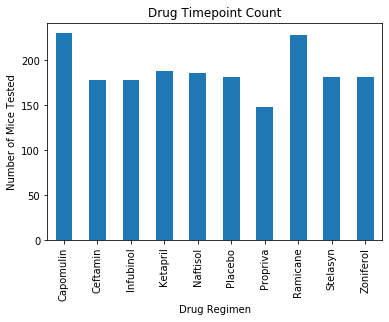

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugmice_count = combined_results.groupby(['Drug Regimen'])['Mouse ID'].count()
drugmice_count.plot.bar(x='Drug Regimen', y='MouseID', title = "Drug Timepoint Count")
plt.ylabel("Number of Mice Tested")
plt.show()

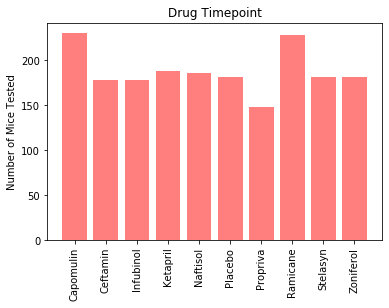

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drugmice_count.index, drugmice_count.values, color='r', alpha=0.5, align="center")
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.title('Drug Timepoint')
plt.show()


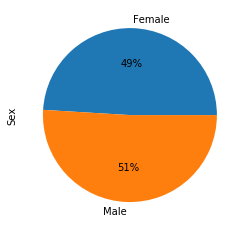

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

combined_results.groupby(['Sex'])['Mouse ID'].count().rename('Sex').plot(kind='pie', autopct='%1.0f%%')

(-1.1065502689644005,
 1.1003119175697333,
 -1.1041200173094385,
 1.1079114197007642)

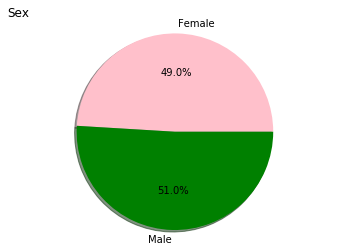

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
colors = ["pink","green"]
plt.pie(combined_results.groupby(['Sex'])['Mouse ID'].count().rename('Count'), labels= labels, colors=colors,
        autopct="%1.1f%%", shadow=True)
labels = combined_results.keys()
plt.title('Sex', loc = 'left')
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouselast = combined_results.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finalcombined_results = pd.merge(mouselast, combined_results, on=['Mouse ID','Timepoint'])
finalcombined_results = finalcombined_results[finalcombined_results['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
finalcombined_results

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ceftamin','Infubinol','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
capo_reg = []
ceft_reg = []
infu_reg = []
rami_reg = []



# Create empty list to fill with tumor vol data (for plotting)
#treatment_volume_df = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
for index, row in finalcombined_results.iterrows(): 
    
    mouse_reg = row["Drug Regimen"]
    
    if mouse_reg == treatments[0]:
        capo_reg.append(row['Tumor Volume (mm3)'])

    elif mouse_reg == treatments[1]:
        ceft_reg.append(row['Tumor Volume (mm3)'])

    elif mouse_reg == treatments[2]:
        infu_reg.append(row['Tumor Volume (mm3)'])
            
    elif mouse_reg == treatments[3]:
        rami_reg.append(row['Tumor Volume (mm3)']) 
        
# Determine outliers using upper and lower bounds
capo_reg = pd.DataFrame ({
                  treatments[0]: capo_reg
                    })

capo_reg

ceft_reg = pd.DataFrame ({
                  treatments[1]: ceft_reg
                    })

                
ceft_reg

infu_reg = pd.DataFrame ({
                  treatments[2]: infu_reg
                    })

                
infu_reg

rami_reg = pd.DataFrame ({
                  treatments[3]: rami_reg
                    })

                
rami_reg


,Ramicane
0,38.407618
1,43.047543
2,38.810366
3,32.978522
4,38.342008
5,33.397653
6,37.311236
7,40.659006
8,29.128472
9,33.562402


In [17]:
rami_reg

,Ramicane
0,38.407618
1,43.047543
2,38.810366
3,32.978522
4,38.342008
5,33.397653
6,37.311236
7,40.659006
8,29.128472
9,33.562402


In [18]:
capo_df = finalcombined_results.loc[finalcombined_results["Drug Regimen"] == "Capomulin",:]

#capo_df

capo_tumor_vol = capo_df["Tumor Volume (mm3)"]

quartiles = capo_tumor_vol.quantile([.25,.5,.75])  #quartiles
lowerq = quartiles[0.25]  #lowerq
upperq = quartiles[0.75]  #upperq
iqr = upperq-lowerq  #iqr

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [19]:
ceft_df = finalcombined_results.loc[finalcombined_results["Drug Regimen"] == "Ceftamin",:]

#cap_df

ceft_tumor_vol = ceft_df["Tumor Volume (mm3)"]

quartiles = ceft_tumor_vol.quantile([.25,.5,.75])  #quartiles
lowerq = quartiles[0.25]  #lowerq
upperq = quartiles[0.75]  #upperq
iqr = upperq-lowerq  #iqr

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [20]:
infu_df = finalcombined_results.loc[finalcombined_results["Drug Regimen"] == "Infubinol",:]

#infu_df

infu_tumor_vol = infu_df["Tumor Volume (mm3)"]

quartiles = infu_tumor_vol.quantile([.25,.5,.75])  #quartiles
lowerq = quartiles[0.25]  #lowerq
upperq = quartiles[0.75]  #upperq
iqr = upperq-lowerq  #iqr

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [35]:
rami_df = finalcombined_results.loc[finalcombined_results["Drug Regimen"] == "Ramicane",:]

#infu_df

rami_tumor_vol = rami_df["Tumor Volume (mm3)"]

quartiles = rami_tumor_vol.quantile([.25,.5,.75])  #quartiles
lowerq = quartiles[0.25]  #lowerq
upperq = quartiles[0.75]  #upperq
iqr = upperq-lowerq  #iqr

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


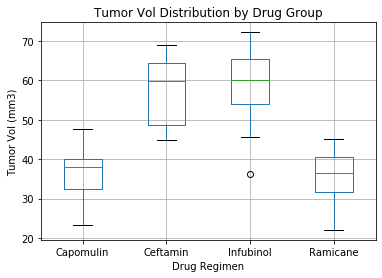

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data= [capo_reg, ceft_reg, infu_reg, rami_reg]
data
regdata = pd.DataFrame(np.column_stack(data), 
                               columns=['Capomulin','Ceftamin','Infubinol','Ramicane'])
regdata


regdata.boxplot()
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Vol (mm3)')
plt.title('Tumor Vol Distribution by Drug Group')

plt.show()

## Line and Scatter Plots

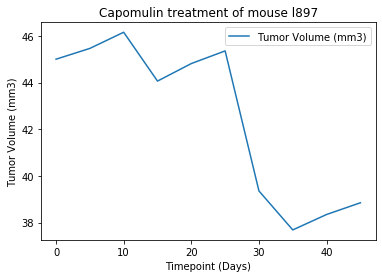

In [87]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomouse = combined_results.loc[((combined_results['Drug Regimen']=='Capomulin') & (combined_results['Mouse ID']=='l897'))] [['Tumor Volume (mm3)','Timepoint']]
capomouse.plot('Timepoint',title="Capomulin treatment of mouse l897")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


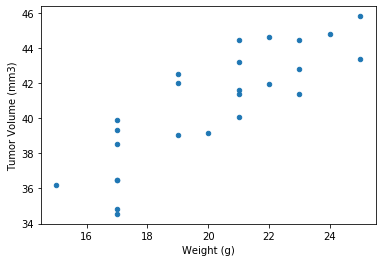

In [76]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomouseseries = combined_results_df.loc[combined_results_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean()
#Capomulin_series

capomouseseries.plot(x='Weight (g)', y='Tumor Volume (mm3)',kind='scatter')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


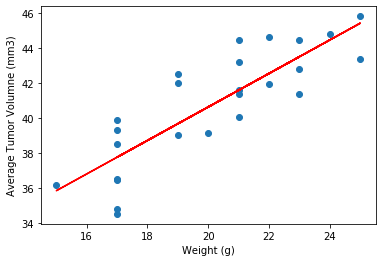

In [77]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomouseseries['Weight (g)']
y_values = capomouseseries['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volumne (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.show()
